In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Reading the data 


In [2]:
diabetes = pd.read_csv("diabetic_data.csv",na_values=['?'])
id_mapping = pd.read_csv("IDs_mapping.csv")

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Dimensions of the data

In [3]:
print(diabetes.shape)
print(id_mapping.shape)

(101766, 50)
(67, 2)


#### Structure of the data

In [4]:
diabetes.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

#### Missing values

In [5]:
diabetes.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [6]:
diabetes = diabetes.drop(['weight','race','medical_specialty','payer_code'],1)

In [7]:
diabetes.dtypes

encounter_id                 int64
patient_nbr                  int64
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide         

In [8]:
diabetes.shape

(101766, 46)

#### Numerical attributes

In [9]:
diabetes_num_attr = diabetes.iloc[:,[0,1,7,8,9,10,11,12,13,17]]
diabetes_num_attr.dtypes

encounter_id          int64
patient_nbr           int64
time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
dtype: object

#### Categorical attributes

In [10]:
diabetes_cat_attr = diabetes.iloc[:,[2,3,4,5,6,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,
                                   42,43,44,45]]

diabetes_cat_attr.dtypes

gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
diag_1                      object
diag_2                      object
diag_3                      object
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone                object
tolazamide                  object
examide                     object
citoglipton                 object
insulin                     object
glyburide-metformin 

#### Chnaging the attribute types

In [11]:
# Categorical attributes
for i in diabetes_cat_attr:
    diabetes_cat_attr[i] = diabetes[i].astype('category')
diabetes_cat_attr.dtypes

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
diag_1                      category
diag_2                      category
diag_3                      category
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
glyburide                   category
tolbutamide                 category
pioglitazone                category
rosiglitazone               category
acarbose                    category
miglitol                    category
troglitazone                category
tolazamide                  category
examide                     category
citoglipton                 category
i

In [12]:
for i in diabetes_cat_attr:
    print(diabetes_cat_attr[i].value_counts())

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64
7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
11        2
14        2
25        2
13        1
Name: a

#### Plots for Categorical attributes

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


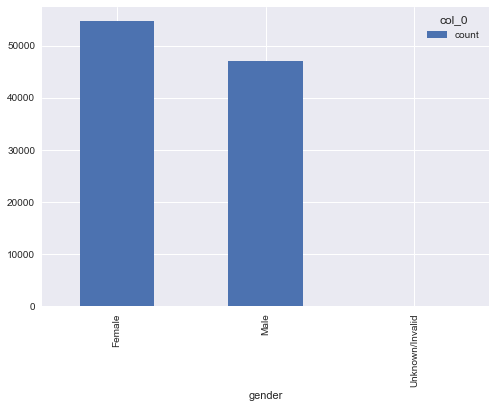

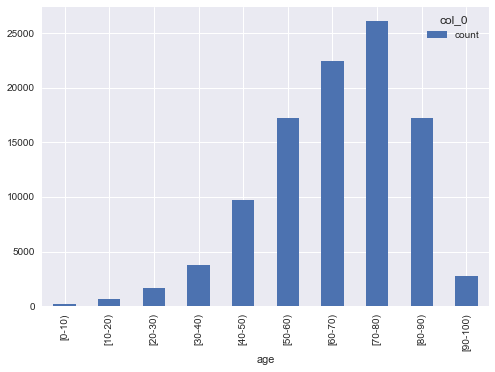

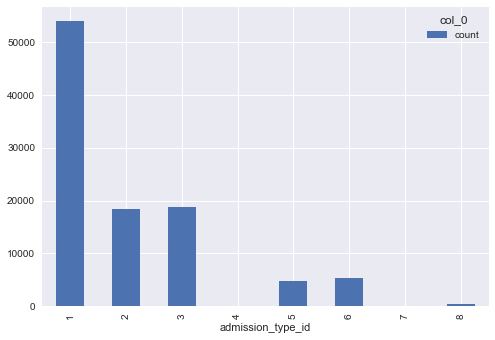

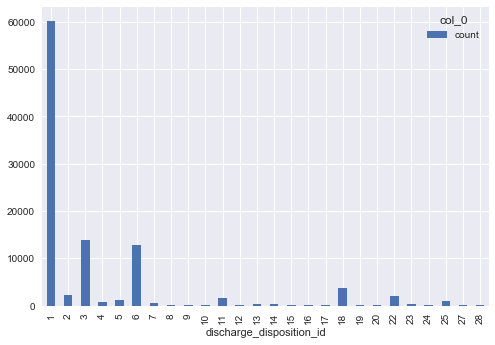

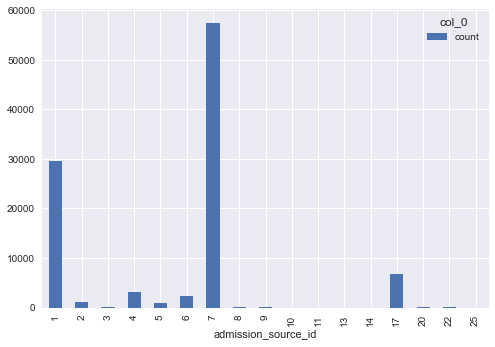

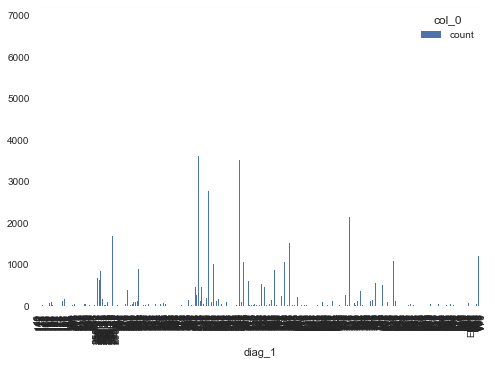

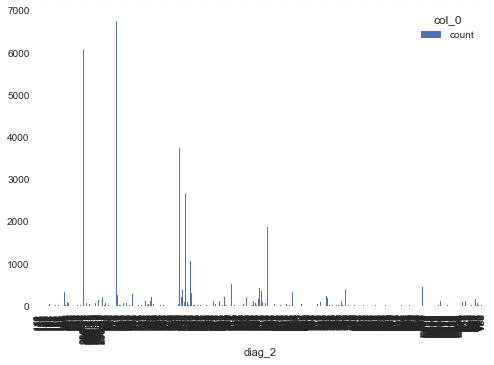

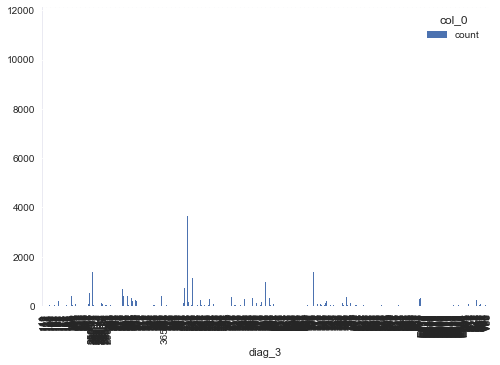

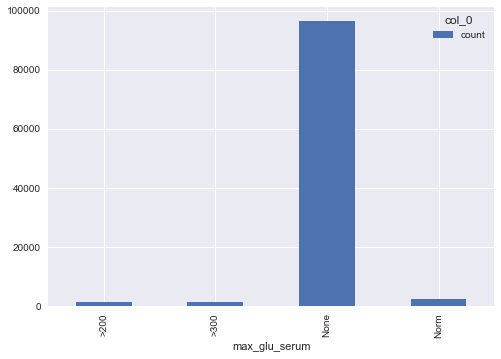

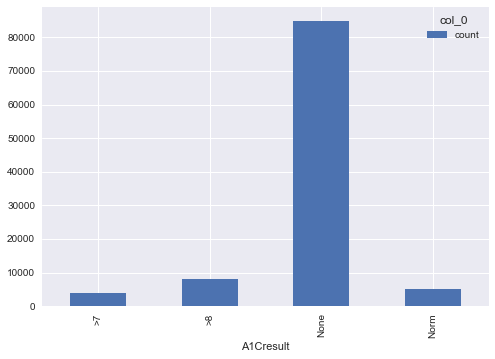

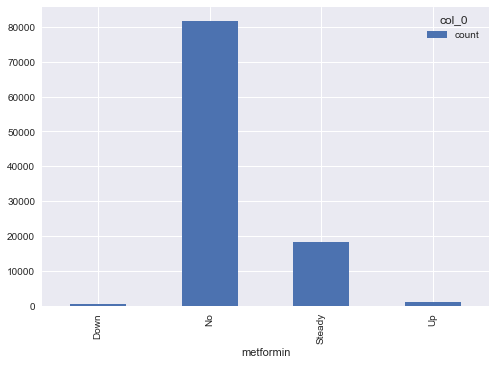

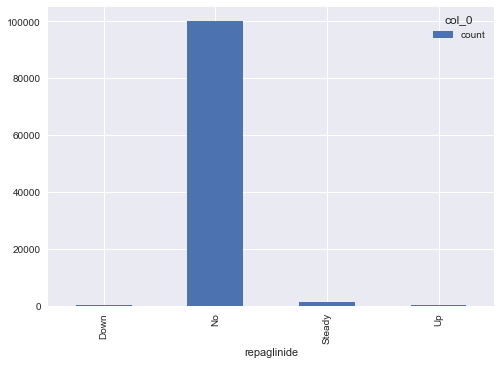

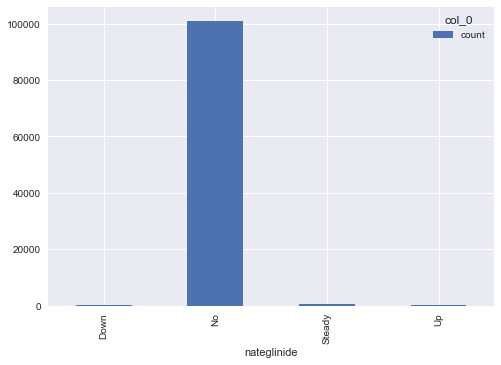

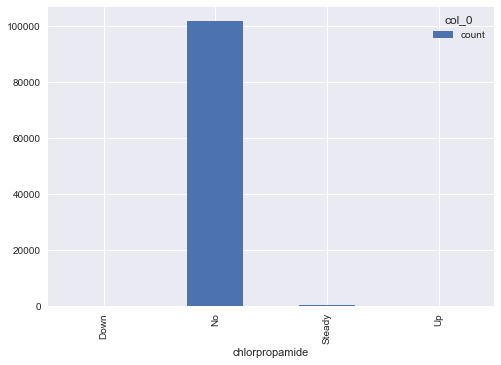

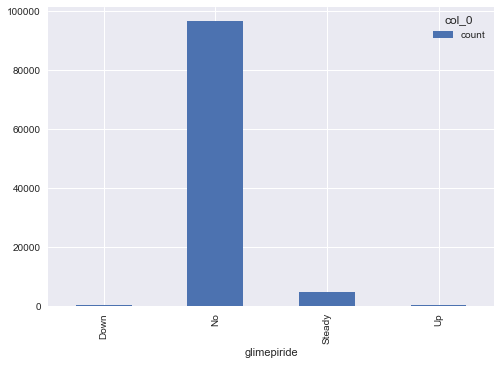

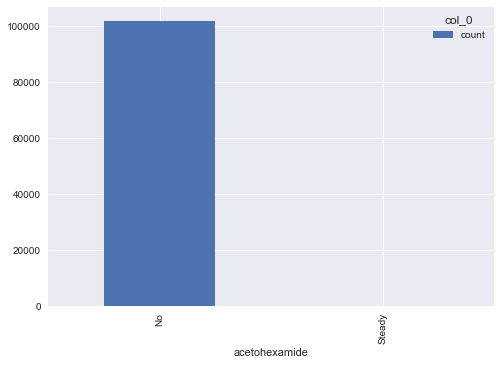

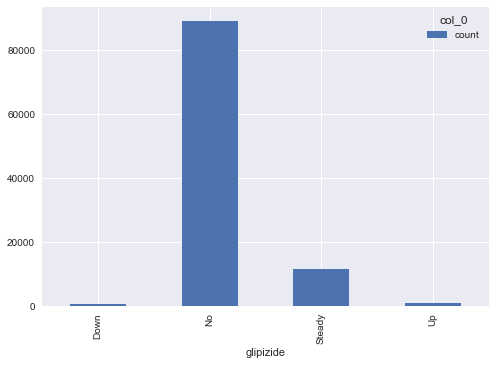

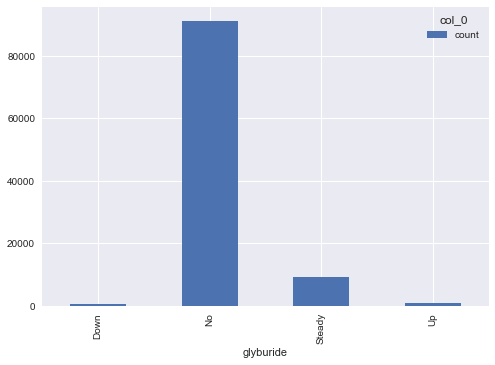

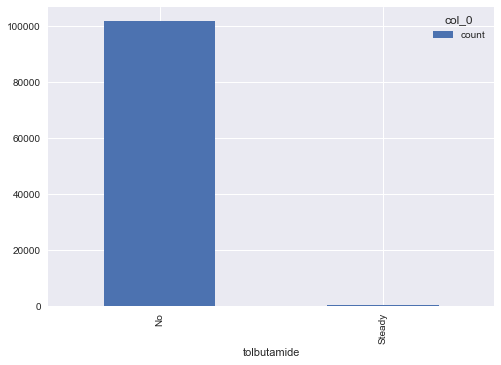

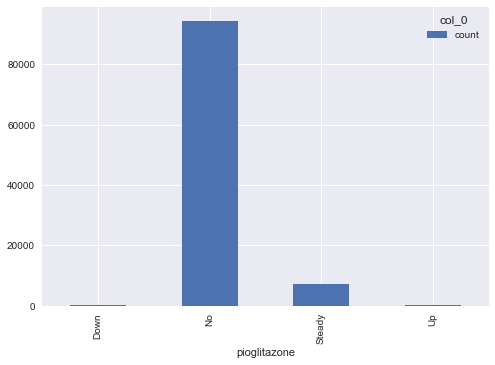

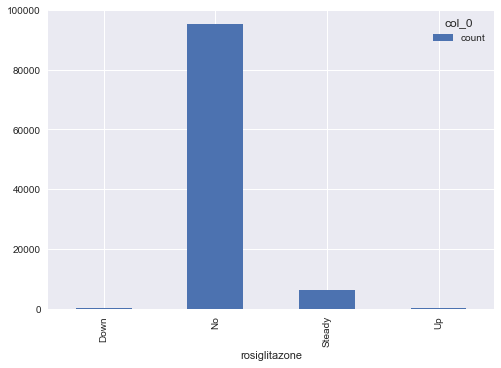

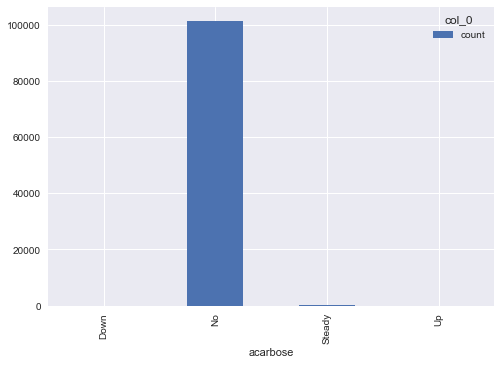

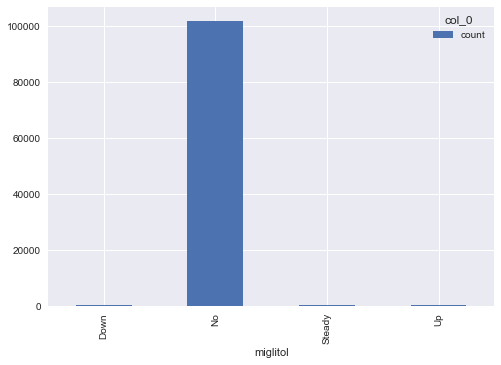

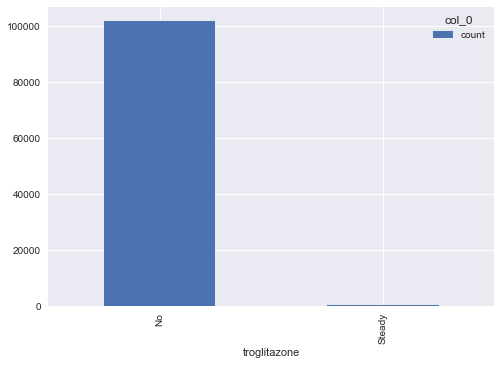

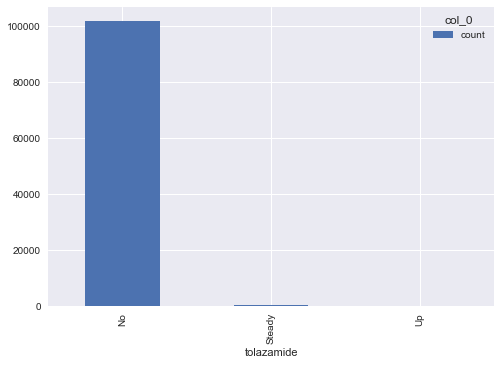

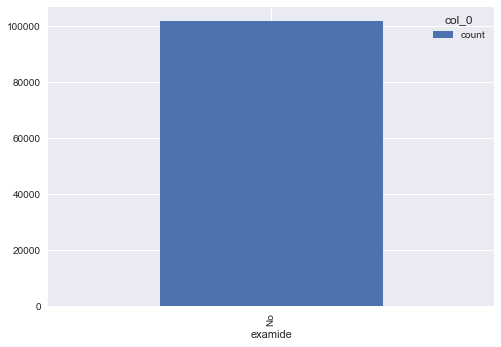

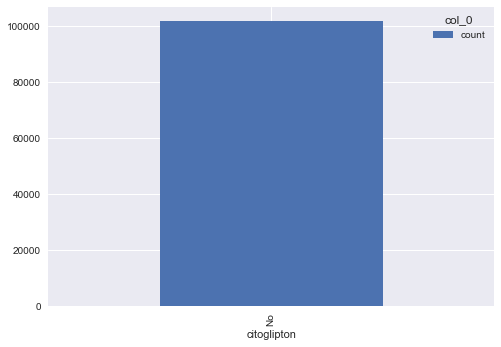

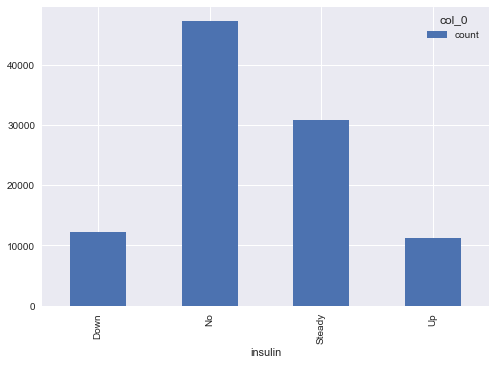

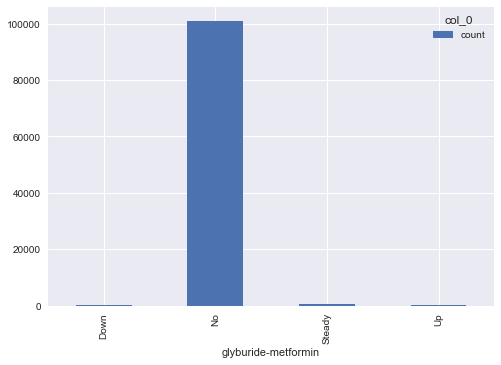

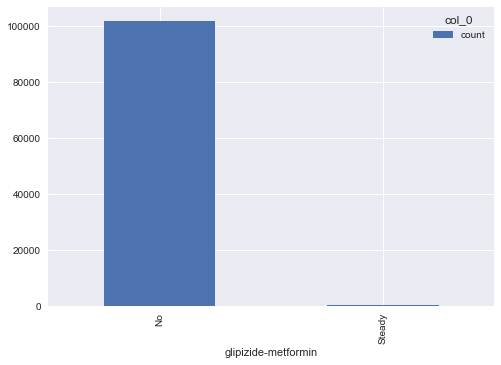

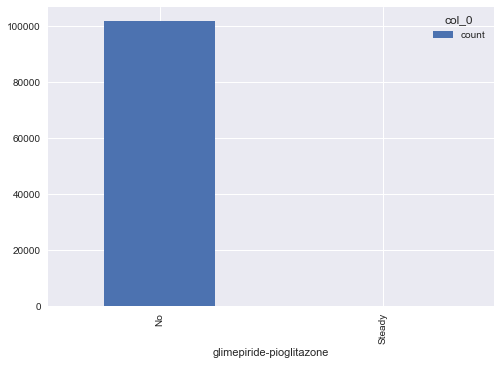

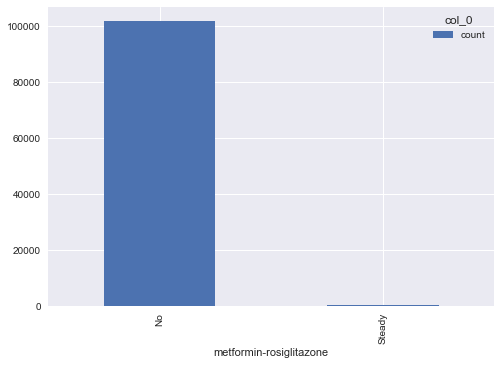

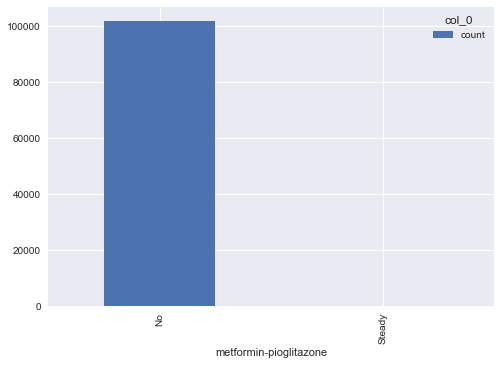

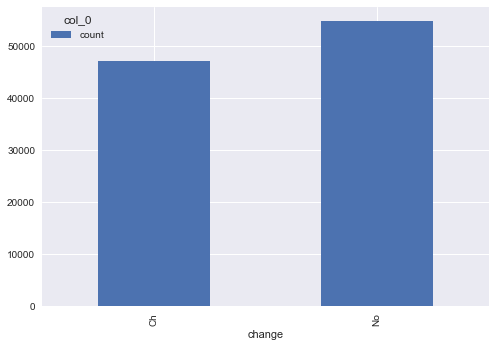

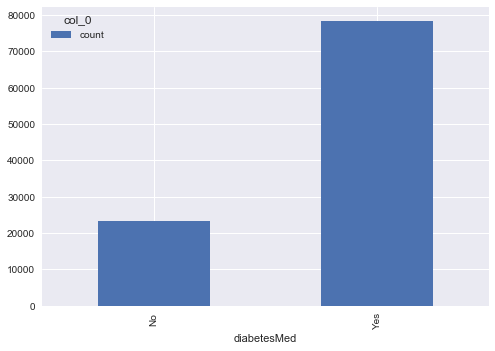

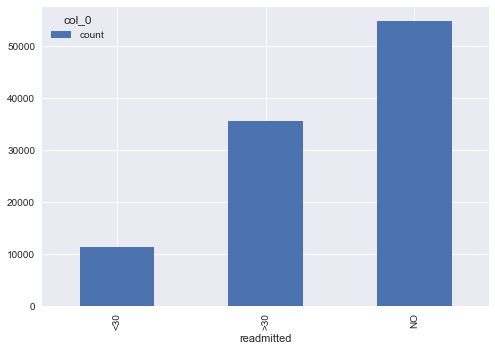

In [13]:
for i in diabetes_cat_attr:
     pd.crosstab(index = diabetes_cat_attr[i],columns="count").plot(kind="bar")

#### Numerical attributes

In [14]:
for i in diabetes_num_attr :
    diabetes_num_attr[i] = diabetes_num_attr[i].astype('int64')

diabetes_num_attr.dtypes

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


encounter_id          int64
patient_nbr           int64
time_in_hospital      int64
num_lab_procedures    int64
num_procedures        int64
num_medications       int64
number_outpatient     int64
number_emergency      int64
number_inpatient      int64
number_diagnoses      int64
dtype: object

In [15]:
# correlation matrix
cor = diabetes_num_attr.corr()
cor

,encounter_id,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.512028,-0.062221,-0.026062,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149
patient_nbr,0.512028,1.000000,-0.024092,0.015946,-0.015570,0.020665,0.103379,0.062352,0.012480,0.226847
time_in_hospital,-0.062221,-0.024092,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,-0.026062,0.015946,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,-0.014225,-0.015570,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.076113,0.020665,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,0.103756,0.103379,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152
number_emergency,0.082803,0.062352,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559,0.055539
number_inpatient,0.030962,0.012480,0.073623,0.039231,-0.066236,0.064194,0.107338,0.266559,1.000000,0.104710
number_diagnoses,0.265149,0.226847,0.220186,0.152773,0.073734,0.261526,0.094152,0.055539,0.104710,1.000000


#### Correlation plot

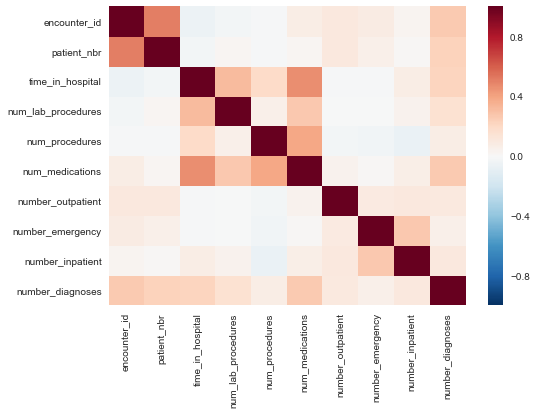

In [16]:
sns.heatmap(cor)

#### Histograms for numerical attributes

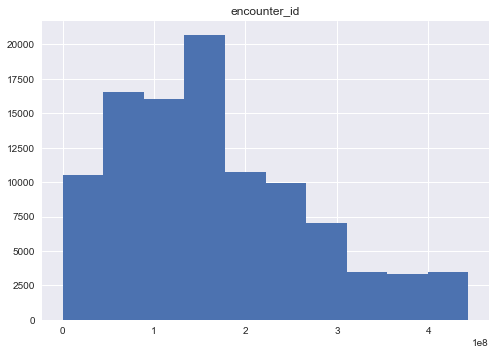

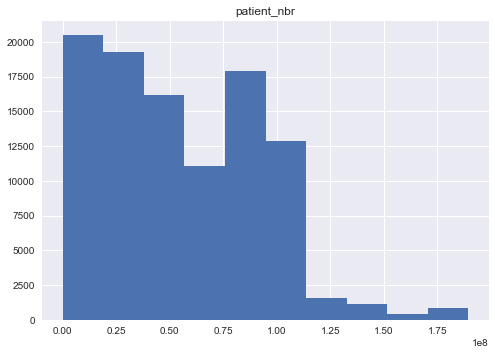

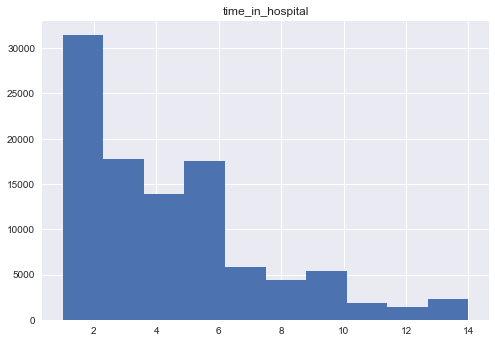

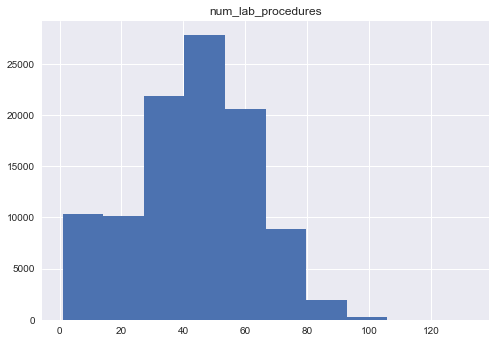

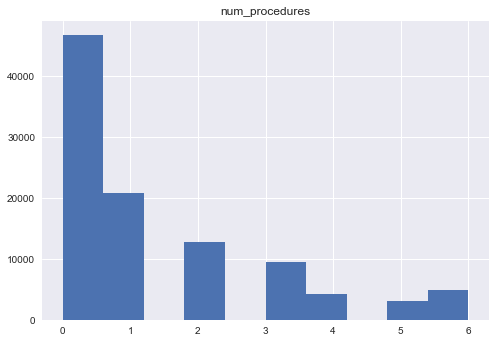

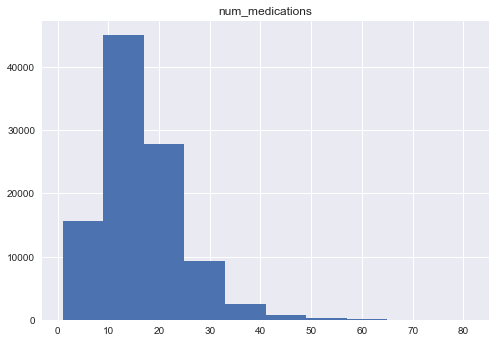

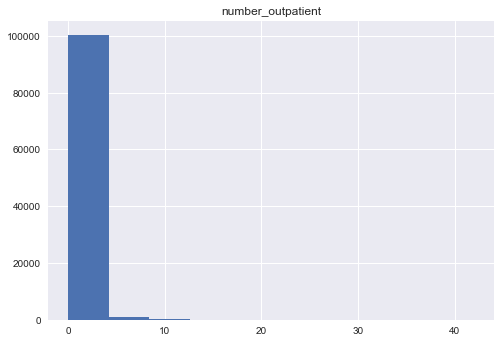

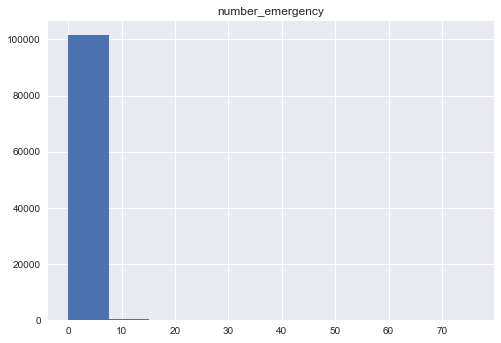

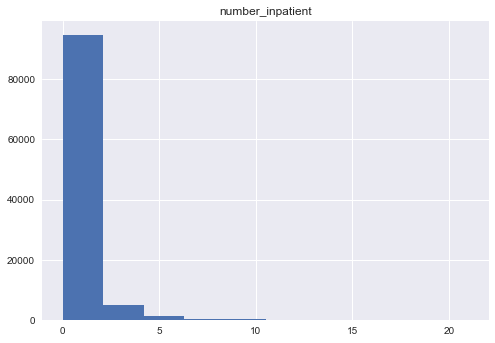

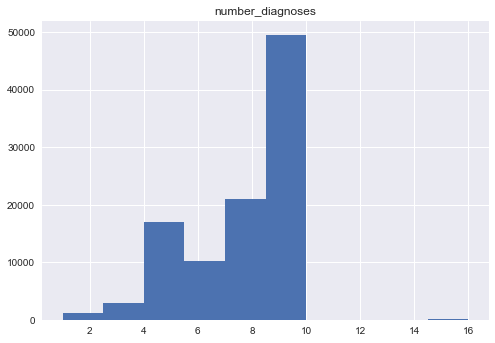

In [17]:
for i in diabetes_num_attr:
    diabetes_num_attr.hist(i)

#### Combining numerical and categorical attributes 

In [18]:
a = [diabetes_num_attr,diabetes_cat_attr]

diabetes_new = pd.concat(a,axis=1)
print(diabetes_new.shape)
print(diabetes_new.dtypes)

(101766, 46)
encounter_id                   int64
patient_nbr                    int64
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
number_diagnoses               int64
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
diag_1                      category
diag_2                      category
diag_3                      category
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                

#### Removing variables with no variance & with huge missing values

In [19]:
diabetes_new = diabetes_new.drop(['encounter_id', 'patient_nbr','examide','citoglipton'],1)

#### Droping the missing values

In [20]:
diabetes_new = diabetes_new.dropna()

In [21]:
print(diabetes_new.shape)
print(diabetes_new.dtypes)
print(diabetes_new.isnull().sum())

(100244, 42)
time_in_hospital               int64
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
number_diagnoses               int64
gender                      category
age                         category
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
diag_1                      category
diag_2                      category
diag_3                      category
max_glu_serum               category
A1Cresult                   category
metformin                   category
repaglinide                 category
nateglinide                 category
chlorpropamide              category
glimepiride                 category
acetohexamide               category
glipizide                   category
glyburide                   category
tolbutamide              

#### Replacing string with codes in categorical variables

In [22]:
s = ['gender', 'age','admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

for i in s :
    diabetes_new[i] = diabetes_new[i].cat.codes
for i in s : 
    diabetes_new[i] = diabetes_new[i].astype('category')
    

#### Train Test and Validation Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
y = diabetes_new.diabetesMed
x = diabetes_new.drop(['diabetesMed'],1)

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,train_size = 0.8)

In [26]:
x_train,x_val,y_train,y_val = train_test_split(xtrain, ytrain,test_size = 0.2)

In [27]:
print(x_train.shape,y_train.shape) # 60 %  
print(x_val.shape,y_val.shape) # 20 % 
print(xtest.shape,ytest.shape) # 20 %

(64156, 41) (64156,)
(16039, 41) (16039,)
(20049, 41) (20049,)


#### Class Imbalance

In [28]:
y_train.value_counts() #There is no class imbalance

1    49333
0    14823
Name: diabetesMed, dtype: int64

## Model Building

In [29]:
from sklearn.linear_model import LogisticRegression

#### Logistic Model

In [85]:
model = LogisticRegression()
log_model = model.fit(x_train, y_train)

#### Predictions

In [31]:
train_pred = model.predict(x_train)
val_pred = model.predict(x_val)

#### Confusion Matrix

In [32]:
from sklearn import metrics
metrics.confusion_matrix(y_val,val_pred)

array([[ 3637,     0],
       [   41, 12361]])

In [33]:
metrics.accuracy_score(y_val,val_pred) ### Validation Predictions

0.99744373090591687

#### Test predictions

In [34]:
testprediction = model.predict(xtest)

In [77]:
print('Accuracy is',metrics.accuracy_score(ytest,testprediction))
print('F1 score is',metrics.f1_score(ytest,testprediction))

Accuracy is 0.997605865629
F1 score is 0.998441153546


#### Decision Tree


In [36]:
from sklearn import tree

In [37]:
tree_model = tree.DecisionTreeClassifier()

In [38]:
t = tree_model.fit(X=x_train,y=y_train)

In [39]:
from IPython.display import SVG,Image
import pydotplus
import os
import graphviz
from graphviz import Source
from sklearn.externals.six import StringIO

In [40]:
dot_data = StringIO()
tree.export_graphviz(decision_tree=t,out_file=dot_data) # graphviz - graph visualizations
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

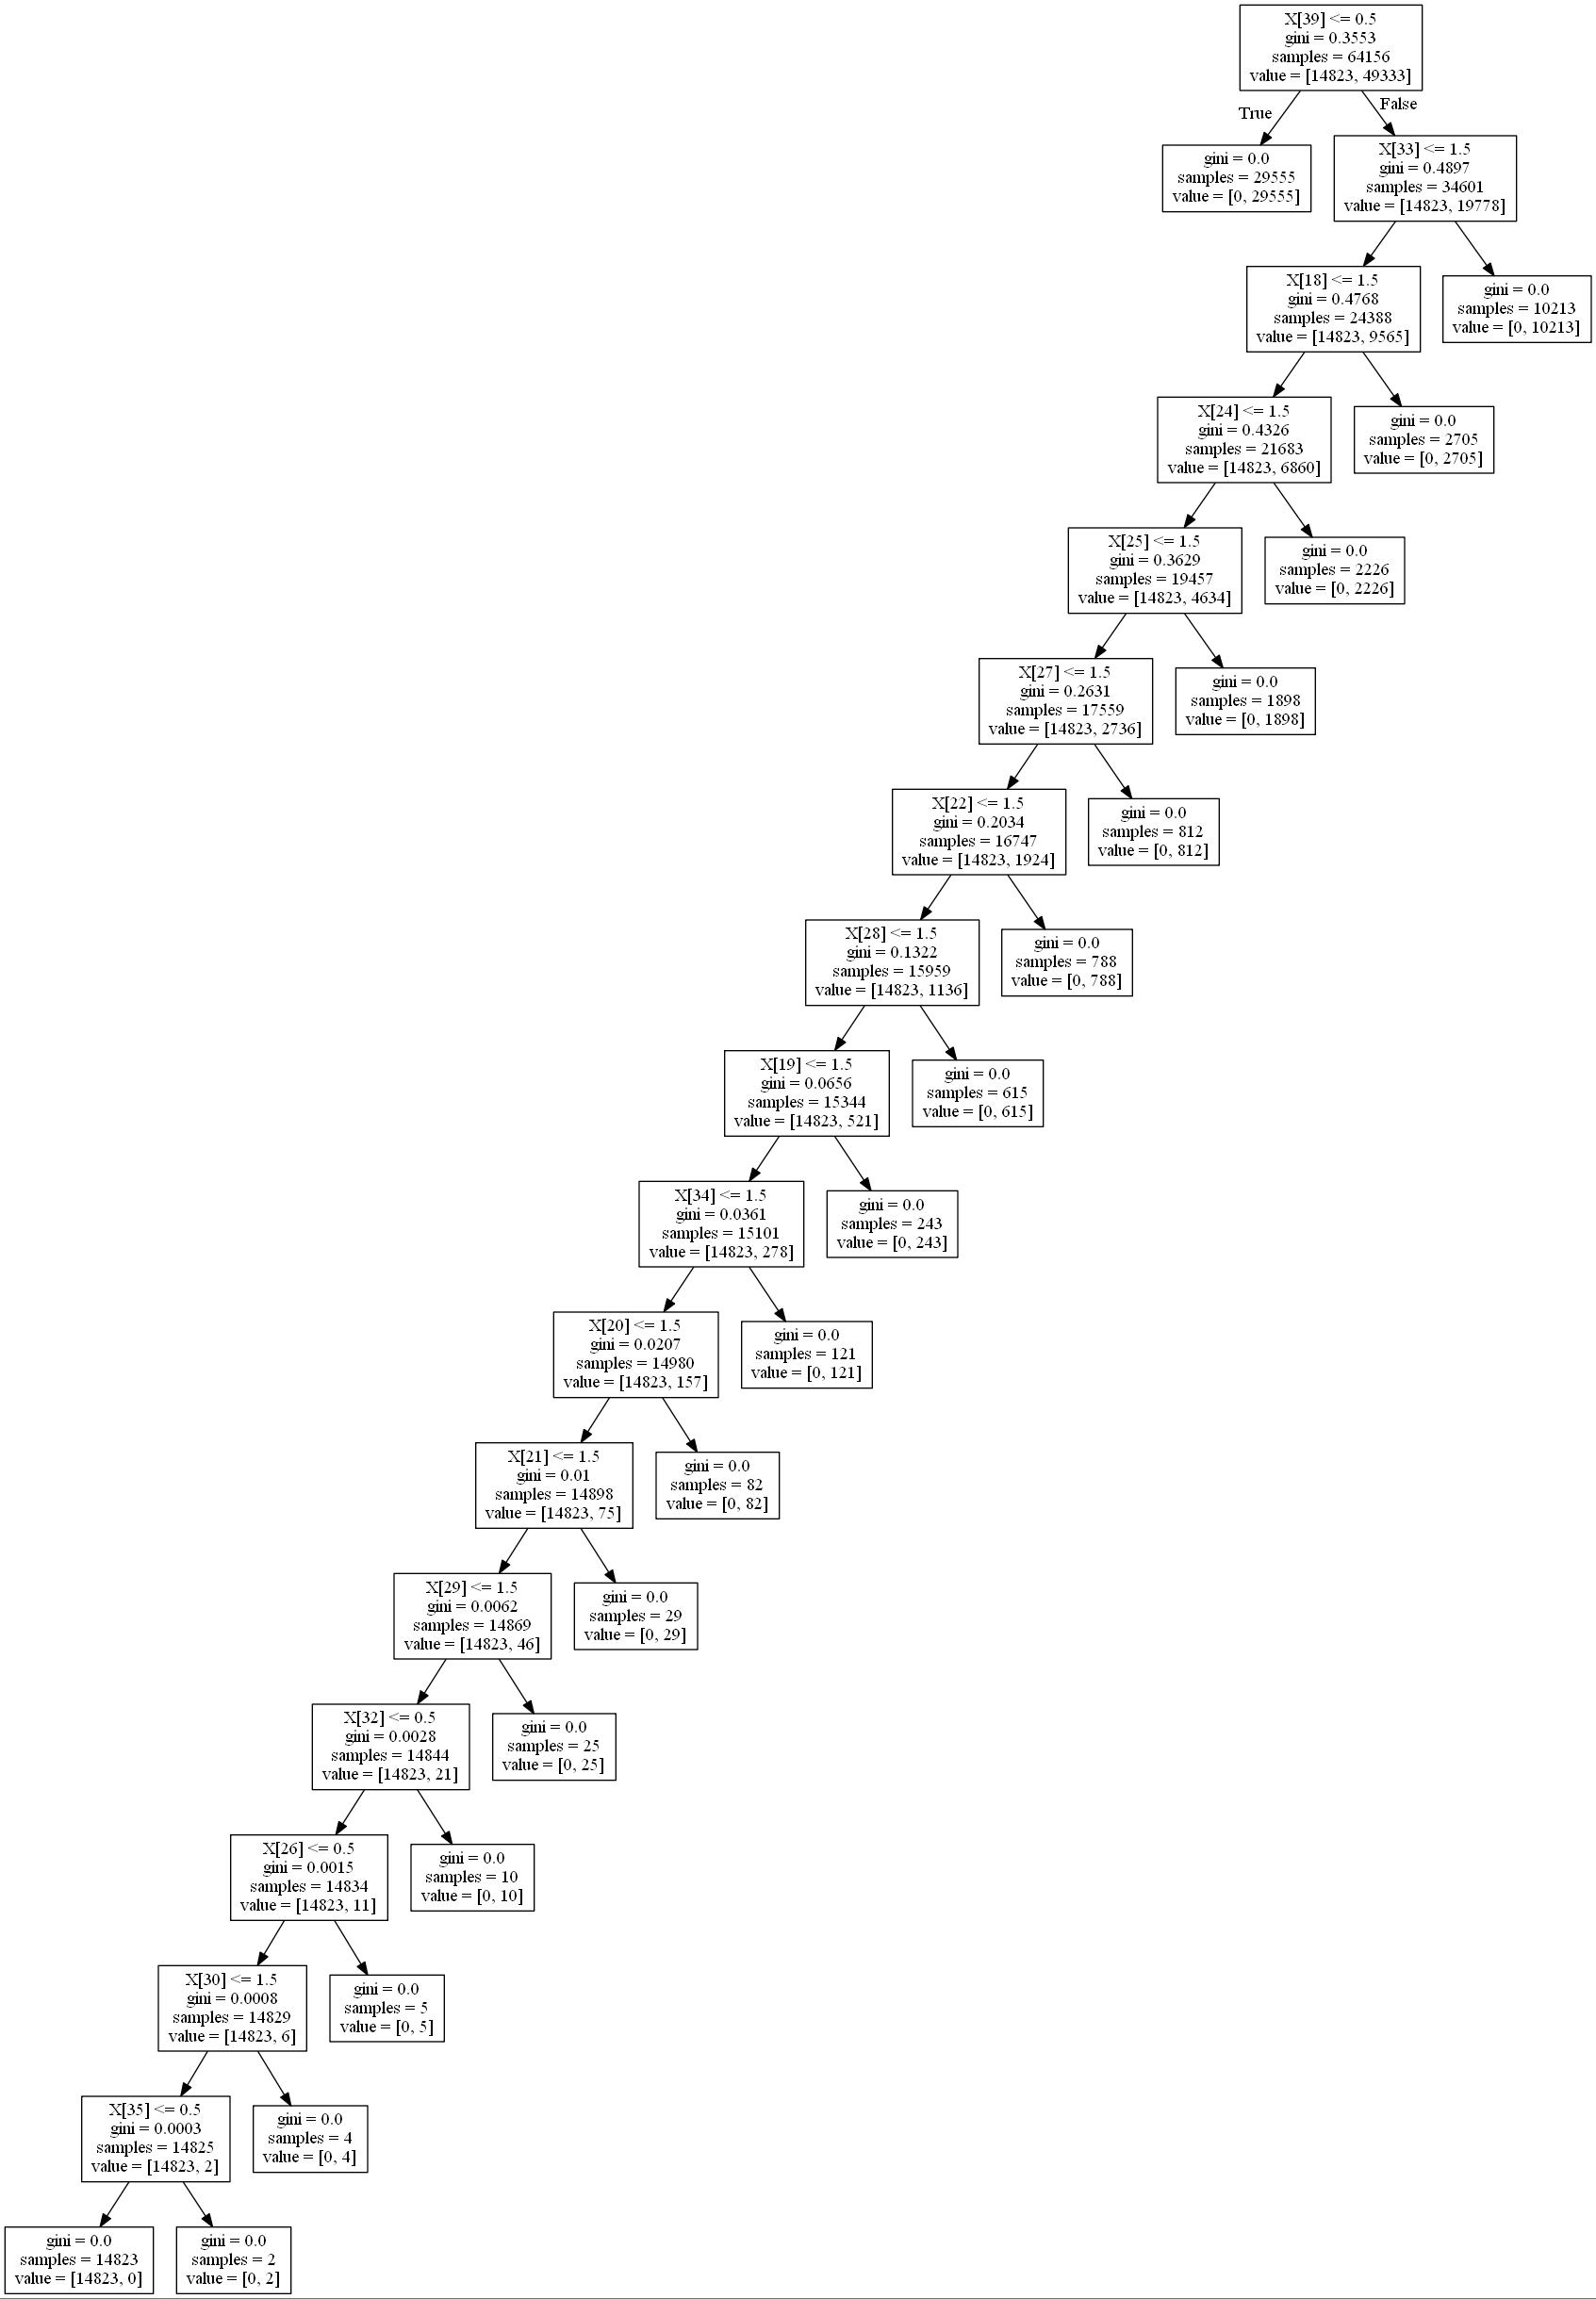

In [41]:
Image(graph.create_jpg())

In [42]:
tval_pred = tree_model.predict(x_val)

In [76]:
print(metrics.f1_score(y_val,tval_pred))
print(metrics.accuracy_score(y_val,tval_pred))

1.0
1.0
1.0


In [44]:
ttest_pred = tree_model.predict(xtest) # Predictions

In [78]:
print(metrics.f1_score(ytest,ttest_pred))
print(metrics.accuracy_score(ytest,ttest_pred))

1.0
1.0


#### SVM

In [46]:
from sklearn.svm import LinearSVC

In [47]:
svm_model = LinearSVC()

In [48]:
svm_model.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [49]:
svm_pred = svm_model.predict(x_val)

In [50]:
metrics.accuracy_score(svm_pred,y_val)

0.9859093459692001

In [51]:
svm_test_pred = svm_model.predict(xtest) # Prediction

In [79]:
print(metrics.accuracy_score(svm_test_pred,ytest))
print(metrics.f1_score(svm_test_pred,ytest))


0.986383360766
0.991068799686


#### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
random_model = RandomForestClassifier(n_estimators=50)

In [55]:
random_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [56]:
random_pred = random_model.predict(x_val)

In [57]:
metrics.accuracy_score(random_pred,y_val)

0.99894008354635577

In [58]:
random_pred1 = random_model.predict(xtest) # predcitions 

In [80]:
metrics.f1_score(random_pred1,ytest)

0.99944846380949293

#### Gradient Boosting 

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
grad_model = GradientBoostingClassifier()

In [62]:
grad_model.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [63]:
p = grad_model.predict(x_val)

In [81]:
metrics.f1_score(p,y_val) 

0.99939489289604255

In [65]:
grad_pred = grad_model.predict(xtest) # Predictions on test

In [82]:
metrics.f1_score(grad_pred,ytest)

0.99951338199513384

#### Majority Voting

In [67]:
s = [pd.DataFrame(testprediction),pd.DataFrame(ttest_pred),pd.DataFrame(random_pred1),
         pd.DataFrame(grad_pred)] # Combining the predictions of models

In [68]:
Maj = pd.concat(s,1)

In [69]:
Maj.columns = ['Logistic','Decision_Tree','Random_Forest','Gradient']

In [70]:
Maj_pred = (Maj.Logistic+Maj.Decision_Tree+Maj.Random_Forest+Maj.Gradient)/4

In [71]:
Maj_pred = Maj_pred.astype('int64') # Predictions

In [83]:
print(metrics.accuracy_score(Maj_pred,ytest)) 
print(metrics.f1_score(Maj_pred,ytest))

0.997605865629
0.998441153546
